# Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

### Goals of the Case Study
There are quite a few goals for this case study.

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## 1. Importing libraries and Understanding Data

In [1]:
import numpy as np #  mathematical operations
import pandas as pd # data handling
import matplotlib.pyplot as plt # plots and graphs
%matplotlib inline
import seaborn as sns # APIs for plotting

import warnings
warnings.filterwarnings('ignore')

##### This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc.
##### which may or may not be useful in ultimately deciding whether a lead will be converted or not.
##### The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.

In [2]:
# 2.1 reading the data
df = pd.read_csv('Leads.csv')
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [3]:
#2.2 to get quick summary
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [4]:
# 2.3 checking the datatypes, memeory,columns etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# 2.4 To see the first few rows
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 2. Data preparation

In [6]:
# Converting all the values to lower case
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [7]:
# Replacing 'select' is a missing value here
df = df.replace('select',np.nan)

In [8]:
# unique value check
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [9]:
# Dropping unique valued columns
df1= df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [10]:
# checking missing value percentages.
df.isnull().mean() * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [11]:
# Removing all the columns that are no required and have high percentage of null value.
df2 = df1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
df2.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,no,no,0,5.0,674,2.5,email opened,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [12]:
# checking missing value percentages again.
df2.isnull().mean() * 100

Prospect ID                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

##### Country,Specialization,What is your current occupation ,What matters most to you in choosing a course are important columns even tho they have a high number of missing values.

In [13]:
# replacing missing values with not provided.
df2['Specialization'] = df2['Specialization'].fillna('not provided') 
df2['What matters most to you in choosing a course'] = df2['What matters most to you in choosing a course'].fillna('not provided')
df2['Country'] = df2['Country'].fillna('not provided')
df2['What is your current occupation'] = df2['What is your current occupation'].fillna('not provided')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [14]:
df2.isnull().mean() * 100

Prospect ID                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper     

In [15]:
df2["Country"].value_counts()

india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

In [16]:
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

df2['Country'] = df2.apply(lambda x:slots(x['Country']), axis = 1)
df2['Country'].value_counts()

india            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [17]:
df3 = df2[df2.isnull().sum(axis=1) <1]

In [18]:
df3.isnull().mean() * 100

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [19]:
# To see the categorical values
gg=0
for column in df3:
    print('Categorical column',gg, 'details')
    print(df3[column].astype('category').value_counts())
    gg = gg+1

Categorical column 0 details
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
aa9b208a-31f7-456f-8968-beee2b2ab2c7    1
aa708f29-9cb7-4959-a251-8aff9613b024    1
aa7e4871-e2f5-4c6a-887a-040c3a7b80bb    1
aa7f5fc5-f49a-44a7-b870-e7abfbd0fe76    1
                                       ..
537963c8-22d9-459d-8aae-ddac40580ffb    1
53744d5a-0483-42c0-80b0-8990a4d2356d    1
53715ab1-2106-4c4e-8493-81cc465eb9ce    1
536cdc6b-f4c1-449d-bfd8-9ef0ac912dbb    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9074, dtype: int64
Categorical column 1 details
landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: Lead Origin, dtype: int64
Categorical column 2 details
google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443
welingak website      129
referral sites        125
facebook               31
bing                    6
click2call 

In [20]:
# Removing Id values since they are unique for everyone
df_final = df3.drop('Prospect ID',1)
df_final.shape

(9074, 21)

## 3. Exploratory Data Analysis


### 3.1 Categorical Variables Analysis


In [21]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

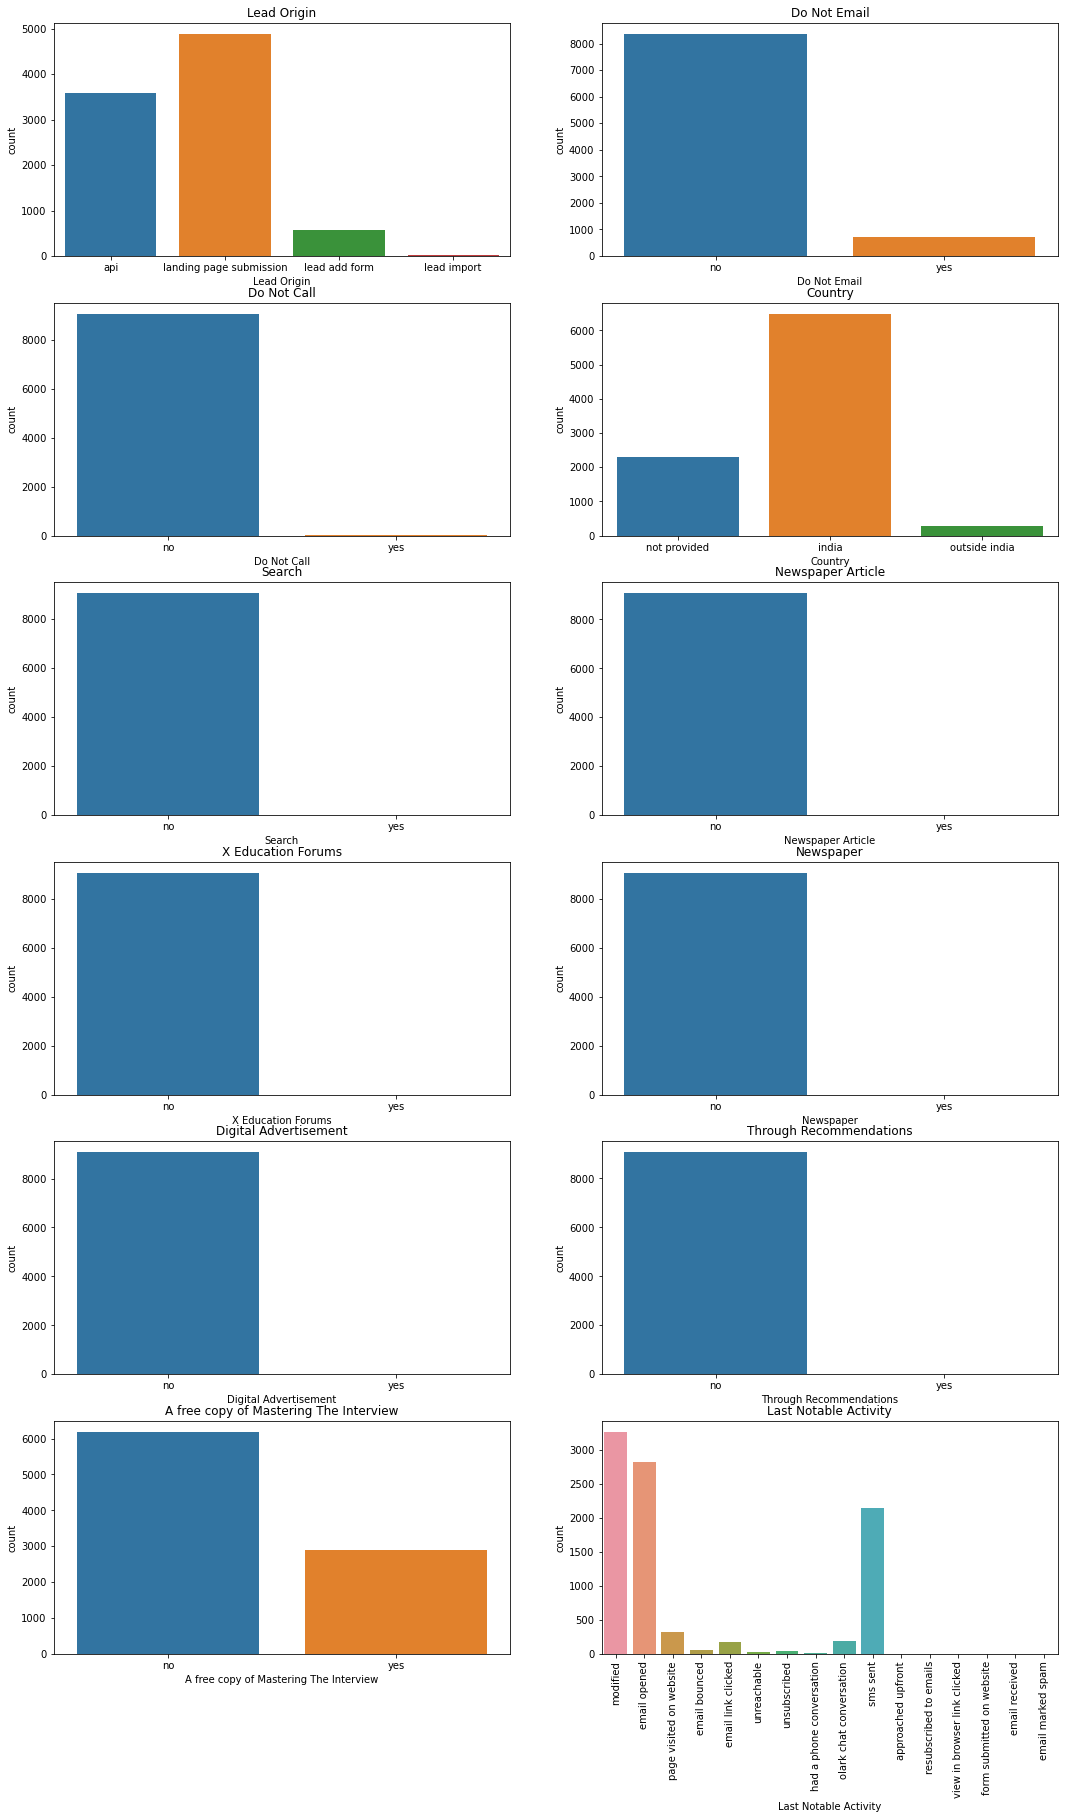

In [22]:
plt.figure(figsize = (18,30))

plt.subplot(6,2,1)
sns.countplot(df_final['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(df_final['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(df_final['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(df_final['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(df_final['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(df_final['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(df_final['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(df_final['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(df_final['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(df_final['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(df_final['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(df_final['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

Text(0.5, 1.0, 'Last Notable Activity')

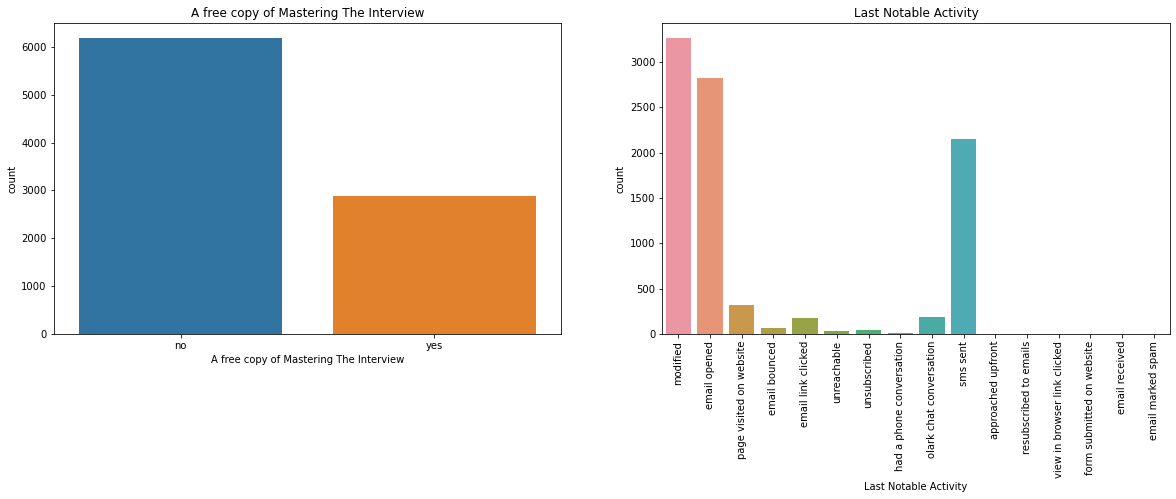

In [23]:
plt.figure(figsize = (20,40))
plt.subplot(6,2,11)
sns.countplot(df_final['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(df_final['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

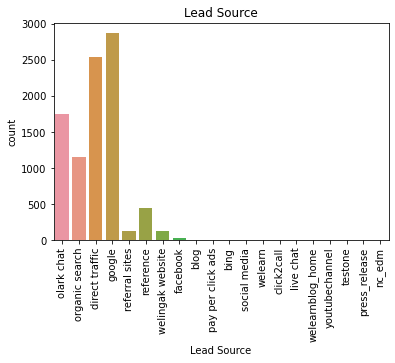

In [24]:
sns.countplot(df_final['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

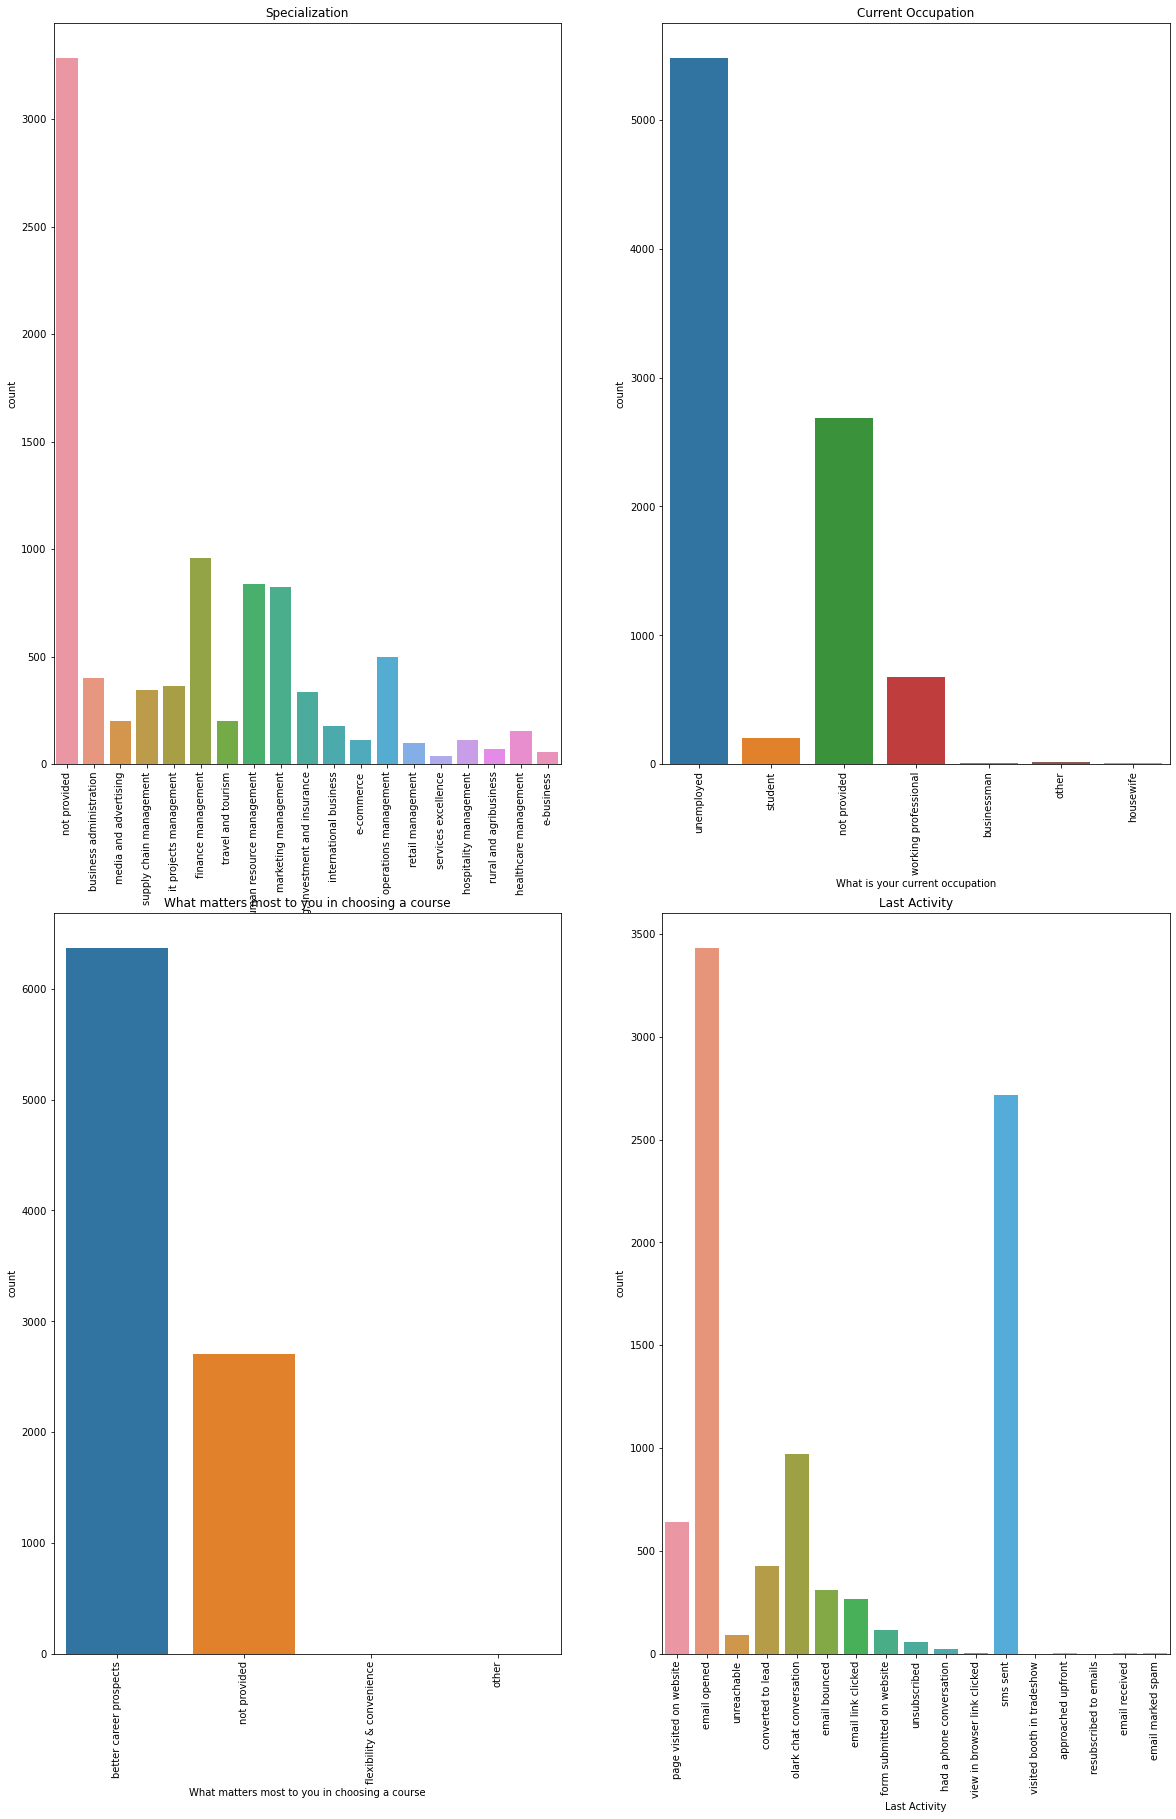

In [25]:
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(df_final['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(df_final['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(df_final['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,4)
sns.countplot(df_final['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

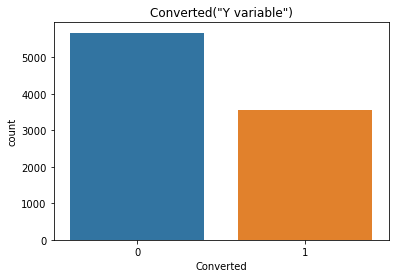

In [26]:
sns.countplot(df['Converted'])
plt.title('Converted("Y variable")')
plt.show()

### 3.2 Numerical variables

In [27]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

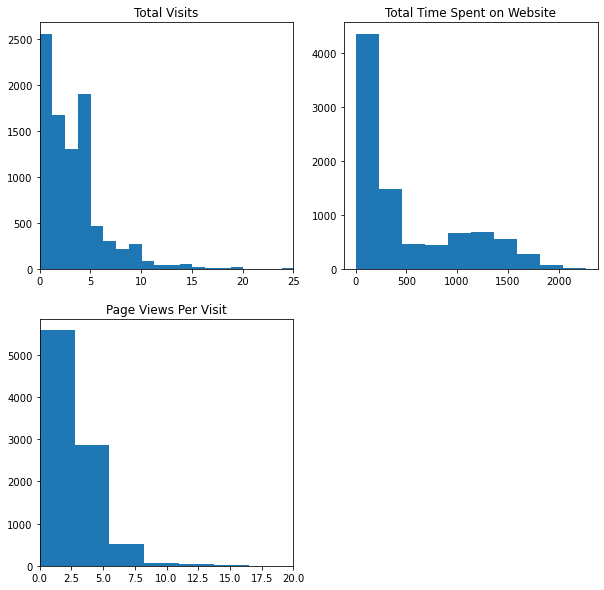

In [28]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df_final['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df_final['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df_final['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

In [29]:
df_final.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,not provided,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


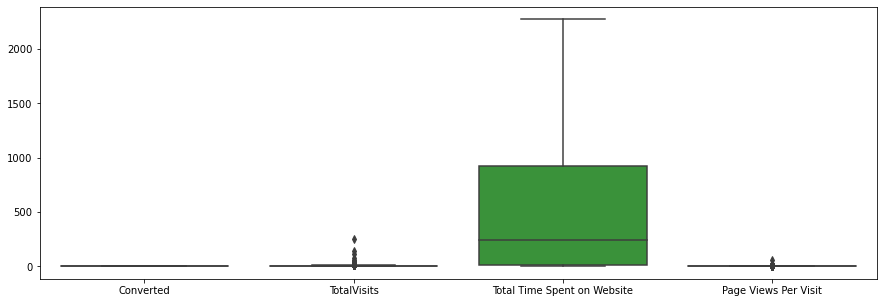

In [30]:
plt.figure(figsize=[15,5])
sns.boxplot(data=df_final)
plt.show()

#### outliers for numerical data are not significant

### 3.3 To check the correlation among varibles

In [31]:
df_final.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.032855,0.359261,0.000260
TotalVisits,0.032855,1.000000,0.219723,0.511068
Total Time Spent on Website,0.359261,0.219723,1.000000,0.318350
Page Views Per Visit,0.000260,0.511068,0.318350,1.000000


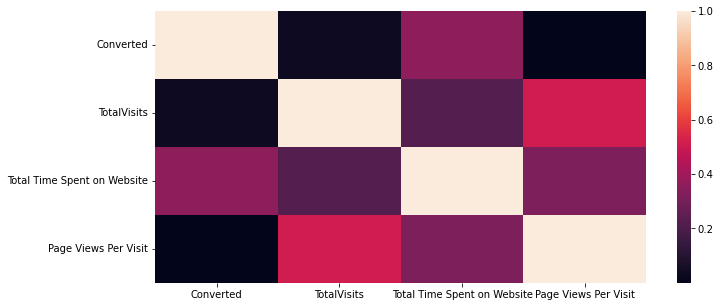

In [32]:
plt.figure(figsize=(11,5))
sns.heatmap(df_final.corr())
plt.show()

#### Page Views Per Visit and TotalVisits is moderately correlated other varibles have very low correlation.

## 4. Creating dummy variables for all categorical variables

In [33]:
# selecting columns that are of object data type.
df_final.loc[:, df_final.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [34]:
# Creating dummy variables 
dummy = pd.get_dummies(df_final[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df_final_dum = pd.concat([df_final, dummy], axis=1)
df_final_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,outside india,...,0,0,0,0,0,0,0,0,0,0
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0


In [35]:
# dropping the non transfomed columns as they are redundant.
df_final_dum = df_final_dum.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
df_final_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## 5. Train Test Splitting 

In [36]:
# Import the required library
from sklearn.model_selection import train_test_split

### 5.1 Making X as predictor columns and y as targert variable

In [37]:
X = df_final_dum.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [38]:
# making Converted column as the target variable
y = df_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

### 5.2 Train test split

In [39]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1)

In [40]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
7656,0.042553,0.154930,0.109091,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7775,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5287,0.028369,0.091989,0.072727,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3315,0.170213,0.660211,0.036364,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4058,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### 5.3 Checking the correlation among all the varibles

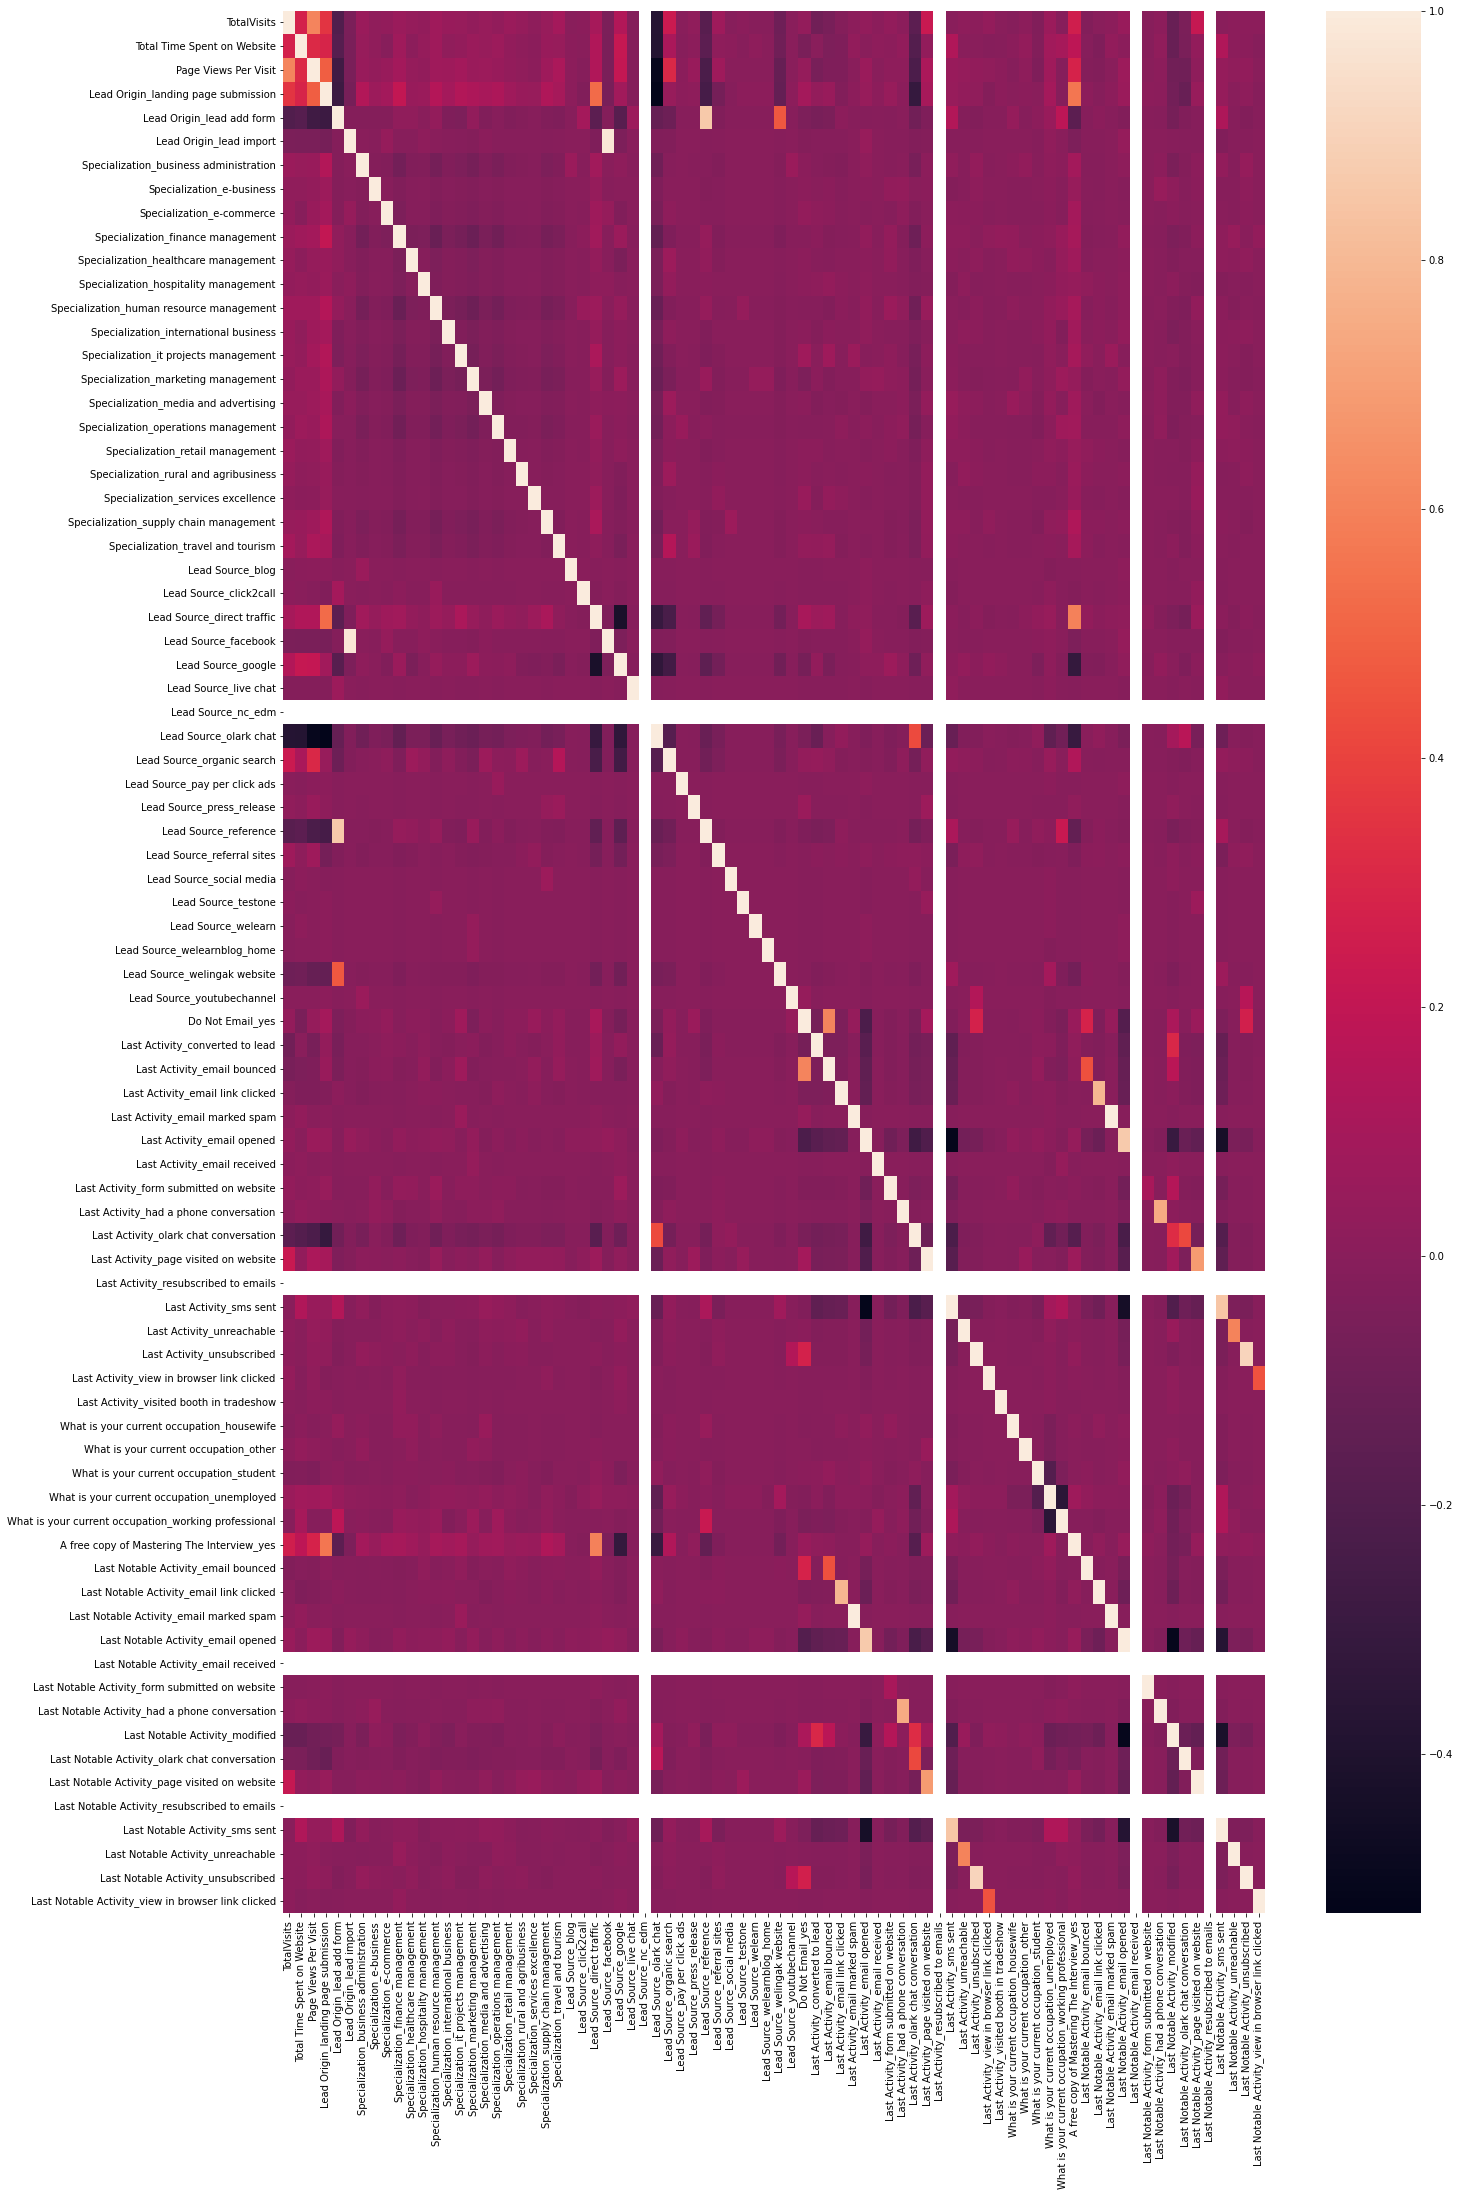

In [41]:
# Checking the correlation among all the varibles(including dummies)
plt.figure(figsize=(22,35))
sns.heatmap(X_train.corr())
plt.show()

## 6. Model Creation

In [42]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
# Import RFE
from sklearn.feature_selection import RFE

### 6.1 Model 1

In [43]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [44]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 4),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('Lead Origin_landing page submission', False, 25),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 46),
 ('Specialization_business administration', False, 26),
 ('Specialization_e-business', False, 22),
 ('Specialization_e-commerce', False, 29),
 ('Specialization_finance management', False, 24),
 ('Specialization_healthcare management', False, 28),
 ('Specialization_hospitality management', False, 62),
 ('Specialization_human resource management', False, 20),
 ('Specialization_international business', False, 39),
 ('Specialization_it projects management', False, 21),
 ('Specialization_marketing management', False, 16),
 ('Specialization_media and advertising', False, 23),
 ('Specialization_operations management', False, 19),
 ('Specialization_retail management', False, 61),
 ('Specialization_rural and agribusiness', False, 17),
 ('Specialization_ser

In [45]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

In [46]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [47]:
# Importing statsmodels
import statsmodels.api as sm

In [48]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2590.8
Date:                Tue, 13 Sep 2022   Deviance:                       5181.7
Time:                        00:40:26   Pearson chi2:                 6.38e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.3133      0.105    -31.507      0.000      -3.519      -3.107
Total Time Spent on Website                              4.5883      0.168     27.273      0.000       4.259       4.918
Lead Origin_lead add form                                3.7919      0.232     16.340      0.000       3.337       4.247
Lead Source_olark chat                                   1.3800      0.106     13.059      0.000       1.173       1.587
Lead Source_welingak website                             2.5060      1.037      2.418      0.016       0.474       4.538
Do Not Email_yes                                        -1.6576      0.183     -9.059      0.000      -2.016      -1.299
Last Activity_olark chat conversation                   -1.1802      0.158     -7.480      0.000      -1.489      -0.871
What is your current occupation_housewife               23.9762   1.41e+04      0.002      0.999   -2.75e+04    2.76e+04
What is your current occupation_other                    1.8605      0.693      2.684      0.007       0.502       3.219
What is your current occupation_student                  1.3650      0.225      6.070      0.000       0.924       1.806
What is your current occupation_unemployed               1.2035      0.089     13.512      0.000       1.029       1.378
What is your current occupation_working professional     3.6008      0.197     18.287      0.000       3.215       3.987
Last Notable Activity_had a phone conversation           3.3229      1.145      2.903      0.004       1.079       5.566
Last Notable Activity_sms sent                           1.4734      0.080     18.314      0.000       1.316       1.631
Last Notable Activity_unreachable                        1.9223      0.558      3.446      0.001       0.829       3.016
Last Notable Activity_unsubscribed                       1.5387      0.486      3.169      0.002       0.587       2.490
========================================================================================================================
"""

##### Last Notable Activity_had a phone conversation and What is your current occupation_housewife have very high p value.


In [49]:
# Importing 'variance_inflation_factor'
# 1/(1-r^2)
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:

# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_unemployed,2.04
0,Total Time Spent on Website,1.84
1,Lead Origin_lead add form,1.54
2,Lead Source_olark chat,1.49
12,Last Notable Activity_sms sent,1.44
5,Last Activity_olark chat conversation,1.37
3,Lead Source_welingak website,1.32
10,What is your current occupation_working profes...,1.30
4,Do Not Email_yes,1.13
14,Last Notable Activity_unsubscribed,1.08


##### VIF have reasonable values

### 6.2 Model 2

In [51]:
# Last Notable Activity_had a phone conversation and What is your current occupation_housewife droping 1 column to see if there is any change
X_train.drop('Last Notable Activity_had a phone conversation', axis = 1, inplace = True)

In [52]:
# checking again
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2597.2
Date:                Tue, 13 Sep 2022   Deviance:                       5194.5
Time:                        00:40:27   Pearson chi2:                 6.38e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.3020      0.105    -31.479      0.000      -3.508      -3.096
Total Time Spent on Website                              4.5780      0.168     27.264      0.000       4.249       4.907
Lead Origin_lead add form                                3.7815      0.232     16.301      0.000       3.327       4.236
Lead Source_olark chat                                   1.3714      0.105     13.003      0.000       1.165       1.578
Lead Source_welingak website                             2.5065      1.037      2.418      0.016       0.475       4.538
Do Not Email_yes                                        -1.6621      0.183     -9.090      0.000      -2.020      -1.304
Last Activity_olark chat conversation                   -1.1850      0.158     -7.514      0.000      -1.494      -0.876
What is your current occupation_housewife               23.9678   1.41e+04      0.002      0.999   -2.76e+04    2.76e+04
What is your current occupation_other                    1.8549      0.693      2.676      0.007       0.497       3.213
What is your current occupation_student                  1.3603      0.225      6.053      0.000       0.920       1.801
What is your current occupation_unemployed               1.2052      0.089     13.546      0.000       1.031       1.380
What is your current occupation_working professional     3.6007      0.197     18.308      0.000       3.215       3.986
Last Notable Activity_sms sent                           1.4649      0.080     18.232      0.000       1.307       1.622
Last Notable Activity_unreachable                        1.9133      0.558      3.430      0.001       0.820       3.006
Last Notable Activity_unsubscribed                       1.5346      0.485      3.162      0.002       0.583       2.486
========================================================================================================================
"""

In [53]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_unemployed,2.04
0,Total Time Spent on Website,1.84
1,Lead Origin_lead add form,1.54
2,Lead Source_olark chat,1.49
11,Last Notable Activity_sms sent,1.44
5,Last Activity_olark chat conversation,1.37
3,Lead Source_welingak website,1.32
10,What is your current occupation_working profes...,1.30
4,Do Not Email_yes,1.13
13,Last Notable Activity_unsubscribed,1.08


In [54]:
# removing 'What is your current occupation housewife' as it has high p value
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

### 6.3 Model 3

In [55]:
# checking again 
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2609.2
Date:                Tue, 13 Sep 2022   Deviance:                       5218.4
Time:                        00:40:27   Pearson chi2:                 6.41e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.2608      0.104    -31.458      0.000      -3.464      -3.058
Total Time Spent on Website                              4.5743      0.167     27.311      0.000       4.246       4.903
Lead Origin_lead add form                                3.8314      0.232     16.502      0.000       3.376       4.286
Lead Source_olark chat                                   1.3595      0.105     12.927      0.000       1.153       1.566
Lead Source_welingak website                             2.4553      1.037      2.369      0.018       0.424       4.487
Do Not Email_yes                                        -1.6681      0.183     -9.125      0.000      -2.026      -1.310
Last Activity_olark chat conversation                   -1.1935      0.158     -7.575      0.000      -1.502      -0.885
What is your current occupation_other                    1.8173      0.693      2.623      0.009       0.459       3.175
What is your current occupation_student                  1.3229      0.225      5.892      0.000       0.883       1.763
What is your current occupation_unemployed               1.1688      0.088     13.285      0.000       0.996       1.341
What is your current occupation_working professional     3.5626      0.196     18.158      0.000       3.178       3.947
Last Notable Activity_sms sent                           1.4563      0.080     18.148      0.000       1.299       1.614
Last Notable Activity_unreachable                        1.8959      0.557      3.405      0.001       0.805       2.987
Last Notable Activity_unsubscribed                       1.5303      0.485      3.156      0.002       0.580       2.480
========================================================================================================================
"""

In [56]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What is your current occupation_unemployed,2.04
0,Total Time Spent on Website,1.83
1,Lead Origin_lead add form,1.54
2,Lead Source_olark chat,1.49
10,Last Notable Activity_sms sent,1.44
5,Last Activity_olark chat conversation,1.37
3,Lead Source_welingak website,1.32
9,What is your current occupation_working profes...,1.30
4,Do Not Email_yes,1.13
12,Last Notable Activity_unsubscribed,1.08


In [57]:
# removing 'What is your current occupation_other' as it has a high p value relative to other columns.
X_train.drop('What is your current occupation_other', axis = 1, inplace = True)

### 6.4 Model 4

In [58]:
# checking again
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2612.7
Date:                Tue, 13 Sep 2022   Deviance:                       5225.3
Time:                        00:40:27   Pearson chi2:                 6.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.2403      0.103    -31.467      0.000      -3.442      -3.038
Total Time Spent on Website                              4.5857      0.167     27.383      0.000       4.257       4.914
Lead Origin_lead add form                                3.8318      0.232     16.510      0.000       3.377       4.287
Lead Source_olark chat                                   1.3582      0.105     12.926      0.000       1.152       1.564
Lead Source_welingak website                             2.4553      1.037      2.369      0.018       0.424       4.487
Do Not Email_yes                                        -1.6585      0.182     -9.094      0.000      -2.016      -1.301
Last Activity_olark chat conversation                   -1.2007      0.157     -7.624      0.000      -1.509      -0.892
What is your current occupation_student                  1.3015      0.224      5.802      0.000       0.862       1.741
What is your current occupation_unemployed               1.1473      0.087     13.138      0.000       0.976       1.318
What is your current occupation_working professional     3.5404      0.196     18.075      0.000       3.157       3.924
Last Notable Activity_sms sent                           1.4507      0.080     18.093      0.000       1.294       1.608
Last Notable Activity_unreachable                        1.8861      0.556      3.391      0.001       0.796       2.976
Last Notable Activity_unsubscribed                       1.5137      0.485      3.124      0.002       0.564       2.463
========================================================================================================================
"""

In [59]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,What is your current occupation_unemployed,2.03
0,Total Time Spent on Website,1.82
1,Lead Origin_lead add form,1.54
2,Lead Source_olark chat,1.49
9,Last Notable Activity_sms sent,1.44
5,Last Activity_olark chat conversation,1.37
3,Lead Source_welingak website,1.32
8,What is your current occupation_working profes...,1.30
4,Do Not Email_yes,1.13
11,Last Notable Activity_unsubscribed,1.08


#### VIF and p vlaues are stable

## 7. Prediction and evaluation

### 7.1 Train set prediction

In [60]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7656    0.169349
7775    0.144146
5287    0.158272
3315    0.718001
4058    0.996477
363     0.167509
6714    0.726811
4797    0.608436
9109    0.122745
5264    0.043823
dtype: float64

In [61]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.16934934, 0.14414593, 0.15827243, 0.71800052, 0.99647661,
       0.16750861, 0.72681067, 0.60843611, 0.12274453, 0.04382329])

In [62]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.169349
1,0,0.144146
2,0,0.158272
3,1,0.718001
4,1,0.996477


In [63]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.169349,0
1,0,0.144146,0
2,0,0.158272,0
3,1,0.718001,1
4,1,0.996477,1


### 7.2 Model Evaluation

In [64]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [65]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3486,  453],
       [ 769, 1643]], dtype=int64)

In [66]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.807589356006928

#### more than 80 % accuracy

In [67]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [68]:
#  sensitivity
print('sensitivity - ',TP/(TP+FN))
# specificity
print('specificity - ',TN/(TN+FP))

sensitivity -  0.6811774461028193
specificity -  0.884996191926885


### 7.3 (ROC Curve) Optimising Cut off 


In [69]:
# cut was selected as .5 randomly.Now it is time to optimize it
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [70]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

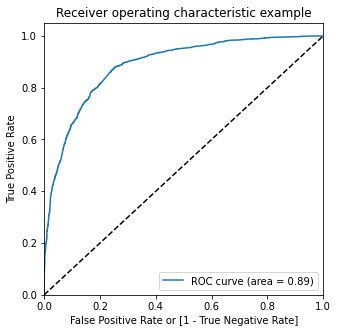

In [71]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### ROC curver area is 88 % which is acceptable

In [72]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.169349,0,1,1,0,0,0,0,0,0,0,0
1,0,0.144146,0,1,1,0,0,0,0,0,0,0,0
2,0,0.158272,0,1,1,0,0,0,0,0,0,0,0
3,1,0.718001,1,1,1,1,1,1,1,1,1,0,0
4,1,0.996477,1,1,1,1,1,1,1,1,1,1,1


In [73]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.379783,1.000000,0.000000
0.1,0.1,0.588884,0.981343,0.348566
0.2,0.2,0.766179,0.907131,0.679868
0.3,0.3,0.799087,0.864842,0.758822
0.4,0.4,0.809479,0.759536,0.840061
0.5,0.5,0.807589,0.681177,0.884996
0.6,0.6,0.803338,0.616086,0.917999
0.7,0.7,0.779090,0.502902,0.948210
0.8,0.8,0.761770,0.422471,0.969535
0.9,0.9,0.710439,0.256633,0.988322


### 7.4 plotting 'accuracy','sensi' and 'speci'

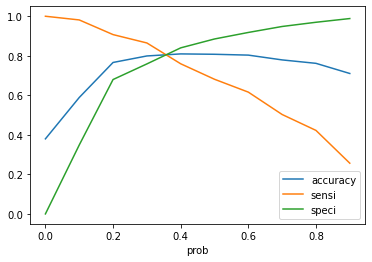

In [74]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [75]:
# we can see that the best cut off is between .3 and .4

In [76]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.169349,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.144146,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.158272,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.718001,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.996477,1,1,1,1,1,1,1,1,1,1,1,1


In [77]:

# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8064871673752165

In [78]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3181,  758],
       [ 471, 1941]], dtype=int64)

In [79]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]


In [80]:
# sensitivity
print('sensitivity -',TP/(TP+FN))
# specificity
print('specificity -',TN/TN+FP)

sensitivity - 0.804726368159204
specificity - 759.0


#### sensitivity and specificity is more than 80 %

### 7.5 Prediction on Test set

In [81]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [82]:
# Substituting all the columns in the final train model
col = X_train.columns

In [83]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm


,const,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_olark chat,Lead Source_welingak website,Do Not Email_yes,Last Activity_olark chat conversation,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed
4079,1.0,0.641725,0,0,0,0,0,0,0,0,0,0,0
8310,1.0,0.000000,0,1,0,0,0,0,1,0,1,0,0
1708,1.0,0.121479,0,0,0,0,0,0,1,0,0,0,0
8025,1.0,0.637324,0,0,0,0,0,0,1,0,0,0,0
2414,1.0,0.000000,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4671,1.0,0.074824,0,0,0,0,0,0,0,1,1,0,0
5884,1.0,0.062500,0,0,0,0,0,0,1,0,0,0,0
2407,1.0,0.114437,0,0,0,0,0,0,0,0,0,0,0
148,1.0,0.102113,0,0,0,0,0,0,1,0,0,0,0


In [84]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.426167
1,1,0.671714
2,0,0.177131
3,1,0.696273
4,0,0.132149


In [85]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.426167,1
1,1,0.671714,1
2,0,0.177131,0
3,1,0.696273,1
4,0,0.132149,0
...,...,...,...
2718,1,0.890321,1
2719,0,0.141078,0
2720,0,0.062065,0
2721,0,0.164555,0


In [86]:

# Checking the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8053617333822989

In [87]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

In [88]:
# sensitivity
print('sensitivity-',TP/(TP+FN))
# specificity
print('specificity-',TN/(TN+FP))

sensitivity- 0.804726368159204
specificity- 0.8075653719218076


#### sensitivity and specificity is about than 80 %

### 7.6 Precision-Recall

In [89]:
#confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )


In [90]:
# calculating Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1]) # Precision = TP / TP + FP

0.7838740458015268

In [91]:
# calculating Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1]) #Recall = TP / TP + FN

0.6811774461028193

#### Precision is about 78 % amd Recall is about 68 %

# 8. Conclusion

#### Variables that matters arethe most in the potential buyers are,
######  -The total time spend on the Website.
###### -Total number of visits.

###### -When the lead source was:
a. Google

b. Direct traffic

c. Organic search

d. Welingak website

###### - When the last activity was:
a. SMS

b. Olark chat conversation

###### -When the lead origin is Lead add format.

###### -When their current occupation is as a working professional.
